# Centrifugal Pump (CP)
March 9th, 2025
Data analysis by Alex Quemel, Rahil Shaik, Sneha Kancharla, and Ethan Mibu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

### Reading in Data from .csv

In [2]:
df = pd.read_csv("MW1-Centrifugal Pump Lab Raw Data - Sheet1.csv")

In [3]:
df

,impeller_diam,motor_speed,ext_fpm,field_voltage,armature_voltage,field_current,armature_current,pump_suction_pressure,pump_discharge_pressure,drive_shaft_torque,flowrate
0,3.500,50,2907.8,139,134,280,2.20,1.3,5.50,5.00,21.5000
1,3.500,40,2317.5,139,107,280,1.89,1.7,5.00,3.20,19.0000
2,3.500,30,1717.9,139,81,280,1.38,2.1,4.25,2.00,17.0000
3,3.500,20,1120.2,138,54,280,1.10,2.5,4.00,1.00,10.5000
4,3.500,10,519.2,138,22,280,0.80,2.6,3.50,0.95,0.0014
5,4.500,50,2770.0,140,130,300,3.60,1.0,6.80,10.50,28.0000
6,4.500,40,2252.0,140,105,290,2.62,1.1,5.80,7.00,26.0000
7,4.500,30,1673.5,140,80,290,1.90,1.7,5.00,4.00,20.7500
8,4.500,20,1074.8,140,50,285,1.30,2.4,4.00,2.00,14.5000
9,4.500,10,487.8,140,25,285,1.00,2.6,4.00,1.00,1.0000


### Analysis Question 1
$$ \textbf {For one impeller, plot head versus capacity with rotational speed as a parameter (See
references for determining head and capacity.)} $$

To start this question, we need to compute pump head for an impeller. Let's start with the 3.5 inch diameter impeller. 

The pump head is defined as the "height which the pump will lift fluid at a given flow rate" (Noel de Nevers, 3) which we can equate by
 
$$ h = \frac{P_{4} - P_{1}}{\rho * g} $$ 

(Noel de Nevers, eqn 10.20) 

We will define P_4 as the pump discharge pressure and P_1 as the pump suction pressure.

In [4]:
rho = 997 #kg/m^3
g = 9.81 #m/s^2

In [5]:
df["pump_head"] = (df["pump_discharge_pressure"] - df["pump_suction_pressure"]) / (rho * g)

Now let's plot this pump head against rotational speed

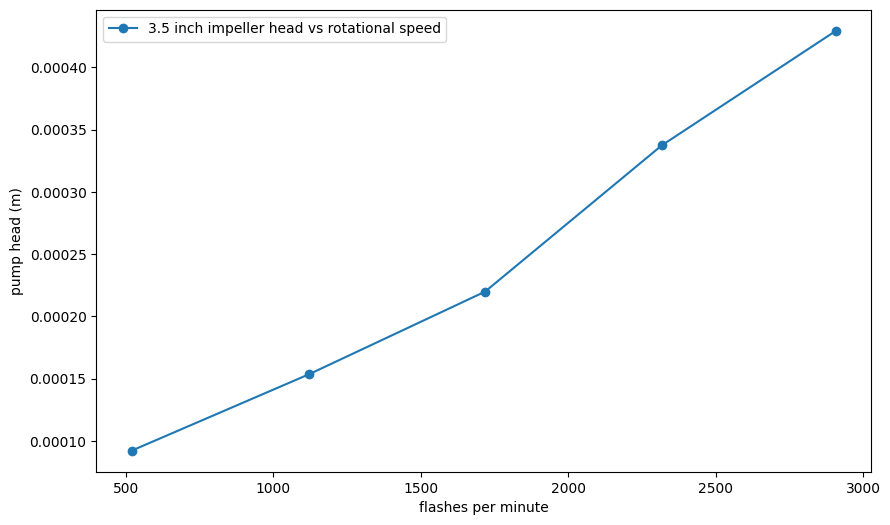

In [6]:
df_small = df.query("impeller_diam == 3.500")

plt.figure(figsize=(10,6))
plt.plot(df_small["ext_fpm"], df_small["pump_head"], marker="o", label="3.5 inch impeller head vs rotational speed")
plt.xlabel("flashes per minute")
plt.ylabel("pump head (m)")
plt.legend()

Let's plot the rest of the impeller sizes to ensure that this is the correct shape we should be looking for

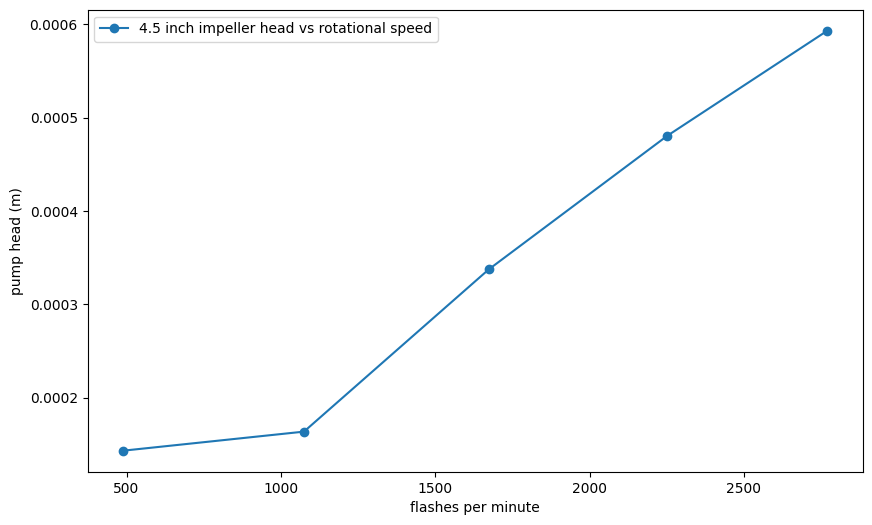

In [7]:
df_med = df.query("impeller_diam == 4.500")

plt.figure(figsize=(10,6))
plt.plot(df_med["ext_fpm"], df_med["pump_head"], marker="o", label="4.5 inch impeller head vs rotational speed")
plt.xlabel("flashes per minute")
plt.ylabel("pump head (m)")
plt.legend()

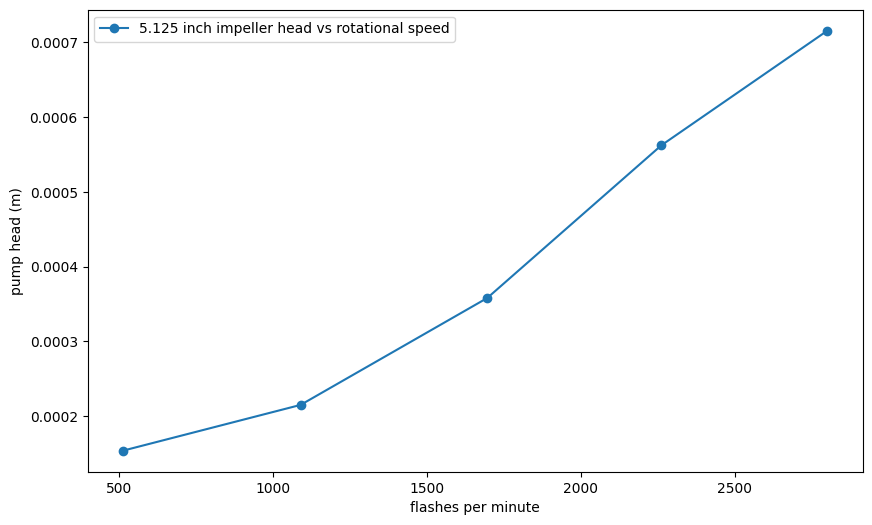

In [8]:
df_big = df.query("impeller_diam == 5.125")

plt.figure(figsize=(10,6))
plt.plot(df_big["ext_fpm"], df_big["pump_head"], marker="o", label="5.125 inch impeller head vs rotational speed")
plt.xlabel("flashes per minute")
plt.ylabel("pump head (m)")
plt.legend()

Now, we have a good sense of the shape, it is best reprsented by the 5.125 inch impeller so we will use this going forward. Let's synthesize a quantitative relationship that describes effect of rotational speed on head. The relationship appears polynomial, so we can fit a polynomial regression to this line. 

In [9]:
X = df_big[["ext_fpm"]].values 
y = df_big["pump_head"].values

In [10]:
X_quad = np.hstack((X, X**2))
model = LinearRegression()
model.fit(X_quad, y)

a, b = model.coef_[1], model.coef_[0]
c = model.intercept_

X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_quad = np.hstack((X_fit, X_fit**2))
y_fit = model.predict(X_fit_quad)


In [11]:
def cubic(N, a, b, c, d):
    return a * N**3 + b * N**2 + c * N + d

popt_cubic, _ = curve_fit(cubic, X.flatten(), y)
y_fit_cubic = cubic(X_fit.flatten(), *popt_cubic)


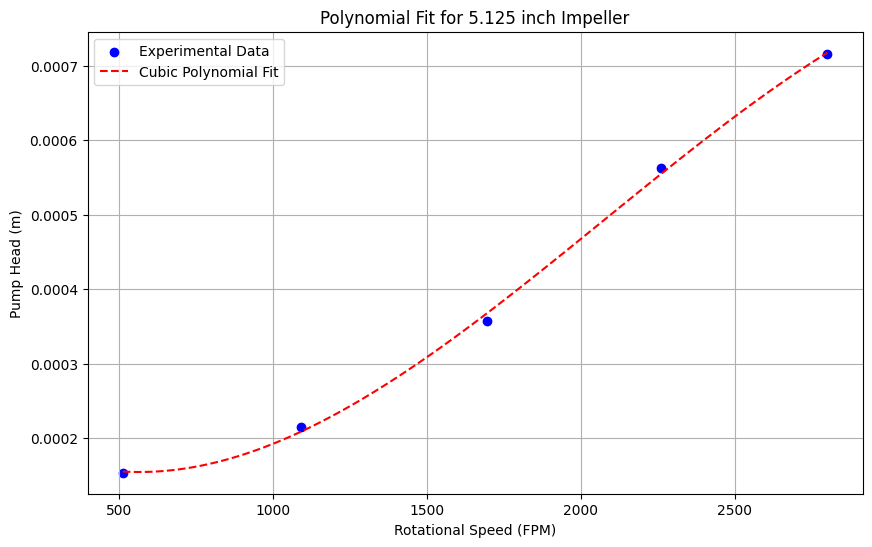

'Poly Fit Eqn = -4.948040e-14N³ + 3.076943e-10N² + -3.013540e-07N + 2.352954e-04'

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Experimental Data", color="blue")
plt.plot(X_fit, y_fit_cubic, label="Cubic Polynomial Fit", color="red", linestyle="--")
plt.xlabel("Rotational Speed (FPM)")
plt.ylabel("Pump Head (m)")
plt.title(f"Polynomial Fit for {5.125} inch Impeller")
plt.legend()
plt.grid(True)
plt.show()

cubic_eq = f"Poly Fit Eqn = {popt_cubic[0]:.6e}N³ + {popt_cubic[1]:.6e}N² + {popt_cubic[2]:.6e}N + {popt_cubic[3]:.6e}"

cubic_eq


So, we can synthesize a head(fpm) expression of 

$$
h(fpm) = -0.0495 fpm^{3} + 0.0308 fpm^{2} -0.0000003 fpm + 0.00024 fpm
$$

### Analysis Question 2

$$ \textbf{Prepare a plot of head as a function of capacity for a single rpm.} $$

Data found for motor speed = 50. Proceeding with plot.


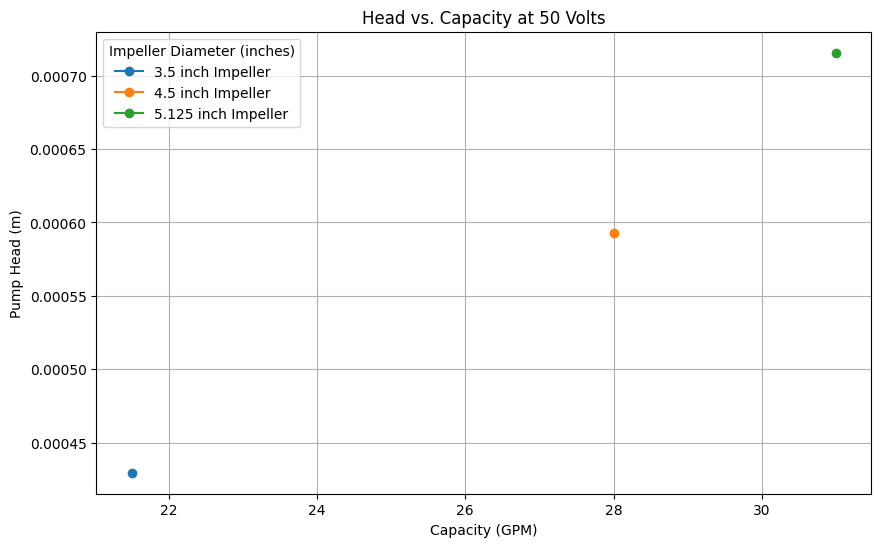

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

rho = 997 # kg/m^3 (Density of water)
g = 9.81   # m/s^2 (Gravity)

# Compute pump head in meters
df["pump_head"] = (df["pump_discharge_pressure"] - df["pump_suction_pressure"]) / (rho * g)

# Get available motor speeds for debugging
available_motor_speeds = df["motor_speed"].unique()

# Select a single RPM to analyze (choose the highest available motor speed)
selected_rpm = max(available_motor_speeds)

# Filter data for the selected motor speed
df_filtered = df[df["motor_speed"] == selected_rpm]

# Ensure filtering worked
if df_filtered.empty:
    print(f"No data found for motor speed = {selected_rpm}. Try another RPM.")
else:
    print(f"Data found for motor speed = {selected_rpm}. Proceeding with plot.")

# Get unique impeller diameters
unique_diameters = df_filtered["impeller_diam"].unique()

# Create the plot
plt.figure(figsize=(10, 6))

for diameter in unique_diameters:
    subset = df_filtered[df_filtered["impeller_diam"] == diameter]
    
    if subset.empty:
        print(f"No data found for impeller diameter {diameter} at {selected_rpm} RPM.")
        continue  # Skip if no data is found
    
    plt.plot(subset["flowrate"], subset["pump_head"], marker='o', linestyle='-', label=f"{diameter} inch Impeller")

# Improve readability
plt.title(f"Head vs. Capacity at {selected_rpm} Volts")
plt.xlabel("Capacity (GPM)")
plt.ylabel("Pump Head (m)")
plt.legend(title="Impeller Diameter (inches)")
plt.grid(True)

# Display the plot
plt.show()


 **Effect of Impeller Diameter on the Head-Capacity Relationship**

As the impeller diameter increases, the head (pressure rise) also increases for the same flow rate. This is because a larger impeller transfers more energy to the fluid, increasing its velocity and pressure.

Additionally, larger impellers can handle higher flow rates at the same motor speed compared to smaller ones. This happens because a bigger impeller moves more fluid per unit time due to its larger peripheral velocity.

Another key observation is that larger impellers produce steeper head-capacity curves. This means that for a given increase in flow rate, the head decreases more gradually for large impellers than for small ones.

In summary, **increasing the impeller diameter results in a higher head, greater flow capacity, and a steeper head-capacity curve**, which directly impacts the pump’s performance.

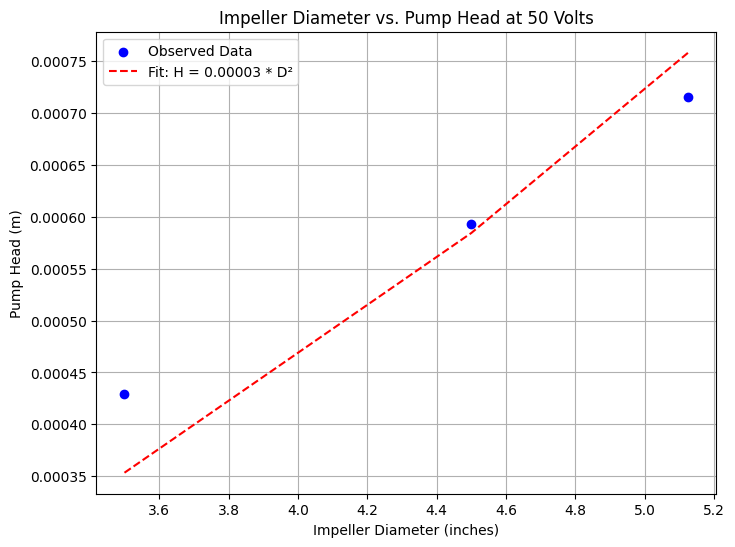

Best-fit quadratic model: H = 0.00003 * D²
R² value: 0.815


In [14]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# Define constants for pump head calculation
rho = 997  # kg/m^3 (Density of water)
g = 9.81   # m/s^2 (Acceleration due to gravity)

# Compute pump head in meters
df["pump_head"] = (df["pump_discharge_pressure"] - df["pump_suction_pressure"]) / (rho * g)

# Select a single motor speed (highest available) for analysis
selected_rpm = max(df["motor_speed"].unique())

# Filter data for the selected motor speed
df_filtered = df[df["motor_speed"] == selected_rpm]

# Compute average head for each impeller diameter at this RPM
impeller_diameters = df_filtered["impeller_diam"].unique()
head_values = [df_filtered[df_filtered["impeller_diam"] == d]["pump_head"].mean() for d in impeller_diameters]

# Sort values for proper fitting
impeller_diameters, head_values = zip(*sorted(zip(impeller_diameters, head_values)))

# Define the quadratic function: H = k * D^2
def quadratic_model(D, k):
    return k * D**2

# Fit the quadratic model to the data
params, _ = curve_fit(quadratic_model, impeller_diameters, head_values)

# Generate predicted values for visualization and R² calculation
head_predicted = quadratic_model(np.array(impeller_diameters), *params)

# Calculate R² value
r2 = r2_score(head_values, head_predicted)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(impeller_diameters, head_values, color='blue', label="Observed Data")
plt.plot(impeller_diameters, head_predicted, color='red', linestyle='--', label=f"Fit: H = {params[0]:.5f} * D²")

# Labels and formatting
plt.title(f"Impeller Diameter vs. Pump Head at {selected_rpm} Volts")
plt.xlabel("Impeller Diameter (inches)")
plt.ylabel("Pump Head (m)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Display results
print(f"Best-fit quadratic model: H = {params[0]:.5f} * D²")
print(f"R² value: {r2:.3f}")

This confirms that head is approximately proportional to the square of impeller diameter, consistent with Affinity Laws.

### Analysis Question 3
$$ \textbf{For the larger impeller at the highest speed, plot the observed head versus capacity and the relationship predicted by the analysis of the ideal pump.} $$

    flowrate  H_ideal
10      31.0  0.00592
Any NaN values in H_ideal? False


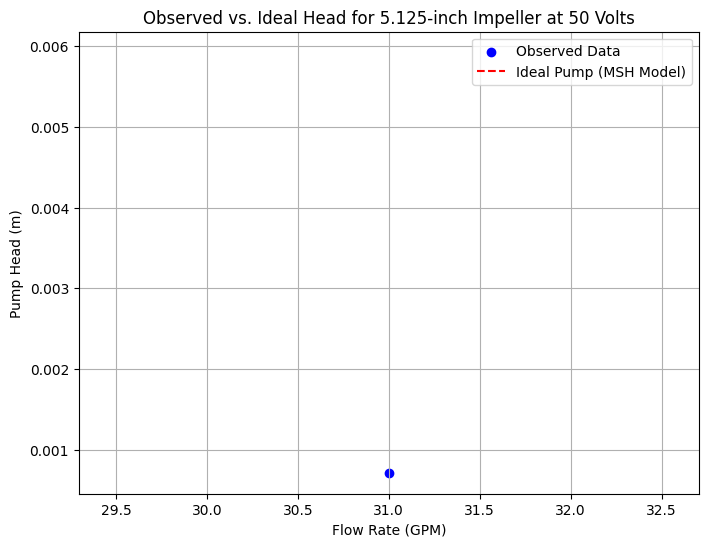

In [16]:
# Compute pump head in meters
df["pump_head"] = (df["pump_discharge_pressure"] - df["pump_suction_pressure"]) / (rho * g)

# Select the largest impeller and highest motor speed
largest_impeller = max(df["impeller_diam"].unique())  # Get max impeller diameter
max_motor_speed = max(df[df["impeller_diam"] == largest_impeller]["motor_speed"])  # Get max speed

# Filter for largest impeller at highest RPM
df_filtered = df[(df["impeller_diam"] == largest_impeller) & (df["motor_speed"] == max_motor_speed)]

# Compute Theoretical Head using Ideal Pump Model (MSH Analysis)
# Theoretical Head: H_ideal = (U^2) / (2g), where U = pi * D * N
df_filtered["U"] = np.pi * (largest_impeller * 0.0254) * (df_filtered["motor_speed"] / 60)  # Convert inches to meters
df_filtered["H_ideal"] = (df_filtered["U"] ** 2) / (2 * g)

# Debugging: Print computed H_ideal values
print(df_filtered[["flowrate", "H_ideal"]])

# Check if there are NaN values
print("Any NaN values in H_ideal?", df_filtered["H_ideal"].isna().any())

# Plot Observed vs. Theoretical Head
plt.figure(figsize=(8, 6))

# Observed Data
plt.scatter(df_filtered["flowrate"], df_filtered["pump_head"], color="blue", label="Observed Data")

# Ideal Pump Model
plt.plot(df_filtered["flowrate"], df_filtered["H_ideal"], color="red", linestyle="--", label="Ideal Pump (MSH Model)")

# Labels and Formatting
plt.title(f"Observed vs. Ideal Head for {largest_impeller}-inch Impeller at {max_motor_speed} Volts")
plt.xlabel("Flow Rate (GPM)")
plt.ylabel("Pump Head (m)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()